In [1]:
import pandas as pd
from scipy import stats
df_understat = pd.read_json('./data/under_shot_data.json')
df_sofascore = pd.read_json('./data/sofa_shot_data.json')

In [2]:
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = preprocessing.Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res


In [3]:
df_understat.info()
print(df_understat.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               46 non-null     int64         
 1   minute           46 non-null     int64         
 2   result           46 non-null     object        
 3   X                46 non-null     float64       
 4   Y                46 non-null     float64       
 5   xG               46 non-null     float64       
 6   player           46 non-null     object        
 7   h_a              46 non-null     object        
 8   player_id        46 non-null     int64         
 9   situation        46 non-null     object        
 10  season           46 non-null     int64         
 11  shotType         46 non-null     object        
 12  match_id         46 non-null     int64         
 13  h_team           46 non-null     object        
 14  a_team           46 non-null     object     

In [4]:
data_understat = df_understat[['player', 'X', 'Y', 'xG']]
print(data_understat)

                player      X      Y        xG
0             Raphinha  0.920  0.624  0.027585
1   Robert Lewandowski  0.954  0.412  0.135576
2           João Félix  0.872  0.391  0.076541
3             Raphinha  0.969  0.488  0.654123
4   Robert Lewandowski  0.932  0.514  0.126038
5             Raphinha  0.864  0.305  0.040520
6           João Félix  0.872  0.596  0.085429
7       Ilkay Gündogan  0.834  0.594  0.055819
8         João Cancelo  0.964  0.601  0.434831
9             Raphinha  0.734  0.540  0.021653
10  Robert Lewandowski  0.952  0.568  0.386009
11            Raphinha  0.927  0.606  0.045518
12     Frenkie de Jong  0.756  0.421  0.024202
13            Raphinha  0.812  0.641  0.110629
14            Raphinha  0.912  0.521  0.101295
15      Ilkay Gündogan  0.741  0.579  0.020296
16            Raphinha  0.834  0.368  0.045099
17      Ilkay Gündogan  0.783  0.557  0.031369
18  Robert Lewandowski  0.943  0.554  0.122883
19      Ilkay Gündogan  0.909  0.812  0.072592
20      Ilkay

In [5]:
df_sofascore.info()
print(df_sofascore.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     46 non-null     object 
 1   isHome                     46 non-null     bool   
 2   shotType                   46 non-null     object 
 3   situation                  46 non-null     object 
 4   playerCoordinates          46 non-null     object 
 5   bodyPart                   46 non-null     object 
 6   goalMouthLocation          46 non-null     object 
 7   goalMouthCoordinates       46 non-null     object 
 8   blockCoordinates           24 non-null     object 
 9   xg                         46 non-null     float64
 10  id                         46 non-null     int64  
 11  time                       46 non-null     int64  
 12  addedTime                  7 non-null      float64
 13  timeSeconds                46 non-null     int64  
 

In [6]:
data_sofascore = df_sofascore[['player', 'playerCoordinates', 'xg']]
print(data_sofascore.head())

                                              player  \
0  {'name': 'Fermín López', 'firstName': 'Fermín ...   
1  {'name': 'Cristhian Stuani', 'slug': 'cristhia...   
2  {'name': 'Robert Lewandowski', 'firstName': ''...   
3  {'name': 'İlkay Gündoğan', 'slug': 'ilkay-gund...   
4  {'name': 'Ferran Torres', 'slug': 'ferran-torr...   

                playerCoordinates        xg  
0  {'x': 12.9, 'y': 62.2, 'z': 0}  0.089518  
1   {'x': 2.6, 'y': 57.3, 'z': 0}  0.186681  
2   {'x': 7.7, 'y': 47.9, 'z': 0}  0.195696  
3   {'x': 9.1, 'y': 54.2, 'z': 0}  0.134803  
4  {'x': 24.8, 'y': 41.9, 'z': 0}  0.024742  


In [7]:
data_sofascore['player_name'] = [x['name'] for x in data_sofascore['player']]

c:\Temp\ipykernel_4884\2760396321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sofascore['player_name'] = [x['name'] for x in data_sofascore['player']]


In [8]:
data_sofascore['X'] = [x['x'] for x in data_sofascore['playerCoordinates']]

c:\Temp\ipykernel_4884\2003814049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sofascore['X'] = [x['x'] for x in data_sofascore['playerCoordinates']]


In [9]:
data_sofascore['Y'] = [x['y'] for x in data_sofascore['playerCoordinates']]

c:\Temp\ipykernel_4884\1705369954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sofascore['Y'] = [x['y'] for x in data_sofascore['playerCoordinates']]


In [10]:
data_sofascore['player_name']

0           Fermín López
1       Cristhian Stuani
2     Robert Lewandowski
3         İlkay Gündoğan
4          Ferran Torres
5             Jhon Solís
6             Jhon Solís
7           Fermín López
8           Fermín López
9         İlkay Gündoğan
10          Jules Koundé
11      Cristhian Stuani
12                 Sávio
13      Valery Fernández
14        İlkay Gündoğan
15    Robert Lewandowski
16        İlkay Gündoğan
17        İlkay Gündoğan
18    Robert Lewandowski
19        İlkay Gündoğan
20             Yan Couto
21      Viktor Tsygankov
22              Raphinha
23        İlkay Gündoğan
24              Raphinha
25              Raphinha
26       Frenkie de Jong
27              Raphinha
28    Robert Lewandowski
29      Miguel Gutiérrez
30      Miguel Gutiérrez
31              Raphinha
32          João Cancelo
33        İlkay Gündoğan
34            João Félix
35      Miguel Gutiérrez
36          Artem Dovbyk
37              Raphinha
38    Robert Lewandowski
39              Raphinha


In [11]:
data_sofascore = data_sofascore[['player_name', 'X', 'Y', 'xg']]
print(data_sofascore.head())

          player_name     X     Y        xg
0        Fermín López  12.9  62.2  0.089518
1    Cristhian Stuani   2.6  57.3  0.186681
2  Robert Lewandowski   7.7  47.9  0.195696
3      İlkay Gündoğan   9.1  54.2  0.134803
4       Ferran Torres  24.8  41.9  0.024742


In [12]:
print(data_understat.head())

               player      X      Y        xG
0            Raphinha  0.920  0.624  0.027585
1  Robert Lewandowski  0.954  0.412  0.135576
2          João Félix  0.872  0.391  0.076541
3            Raphinha  0.969  0.488  0.654123
4  Robert Lewandowski  0.932  0.514  0.126038


In [13]:
len(data_understat)

46

In [14]:
len(data_sofascore)

46

In [15]:
set(data_understat['player'])

{'Artem Dovbyk',
 'Cristhian Stuani',
 'David López',
 'Fermín López',
 'Ferrán Torres',
 'Frenkie de Jong',
 'Ilkay Gündogan',
 'Jhon Solis',
 'João Cancelo',
 'João Félix',
 'Jules Koundé',
 'Miguel Gutiérrez',
 'Raphinha',
 'Robert Lewandowski',
 'Sávio',
 'Valery Fernández',
 'Viktor Tsygankov',
 'Yan Couto'}

In [16]:
set(data_sofascore['player_name'])

{'Artem Dovbyk',
 'Cristhian Stuani',
 'David López',
 'Fermín López',
 'Ferran Torres',
 'Frenkie de Jong',
 'Jhon Solís',
 'João Cancelo',
 'João Félix',
 'Jules Koundé',
 'Miguel Gutiérrez',
 'Raphinha',
 'Robert Lewandowski',
 'Sávio',
 'Valery Fernández',
 'Viktor Tsygankov',
 'Yan Couto',
 'İlkay Gündoğan'}

In [17]:
data_understat.describe()

,X,Y,xG
count,46.000000,46.000000,46.000000
mean,0.876217,0.528065,0.156358
std,0.069200,0.108335,0.181039
min,0.728000,0.301000,0.013073
25%,0.835500,0.464000,0.045203
50%,0.902500,0.536000,0.081206
75%,0.923000,0.595500,0.130447
max,0.984000,0.812000,0.654123


In [18]:
data_sofascore.describe()

,X,Y,xg
count,46.000000,46.000000,46.000000
mean,12.200000,47.452174,0.135148
std,6.578382,10.731133,0.142474
min,2.600000,18.800000,0.009018
25%,7.700000,40.475000,0.044768
50%,9.600000,46.500000,0.084365
75%,16.525000,53.400000,0.159605
max,26.600000,69.900000,0.694513


In [19]:
data_sofascore_scaled = data_scale(data_sofascore[['X', 'Y', 'xg']])

In [20]:
data_sofascore_scaled = pd.DataFrame(data_sofascore_scaled, columns=['X', 'Y', 'xg'])
print(data_sofascore_scaled.head())

          X         Y        xg
0  0.429167  0.849315  0.117434
1  0.000000  0.753425  0.259174
2  0.212500  0.569472  0.272326
3  0.270833  0.692759  0.183495
4  0.925000  0.452055  0.022938


In [21]:
import numpy as np
import matplotlib.pyplot as plt


# Функція для побудови графіка типу павутиння
def radar_chart(ax, data, label, color):
    angles = np.linspace(0, 2*np.pi, len(data), endpoint=False)
    data = np.concatenate((data, [data[0]]))  # Замикання кола
    angles = np.concatenate((angles, [angles[0]]))  # Замикання кола
    ax.plot(angles, data, label=label, color=color)
    ax.fill(angles, data, alpha=0.2, color=color)



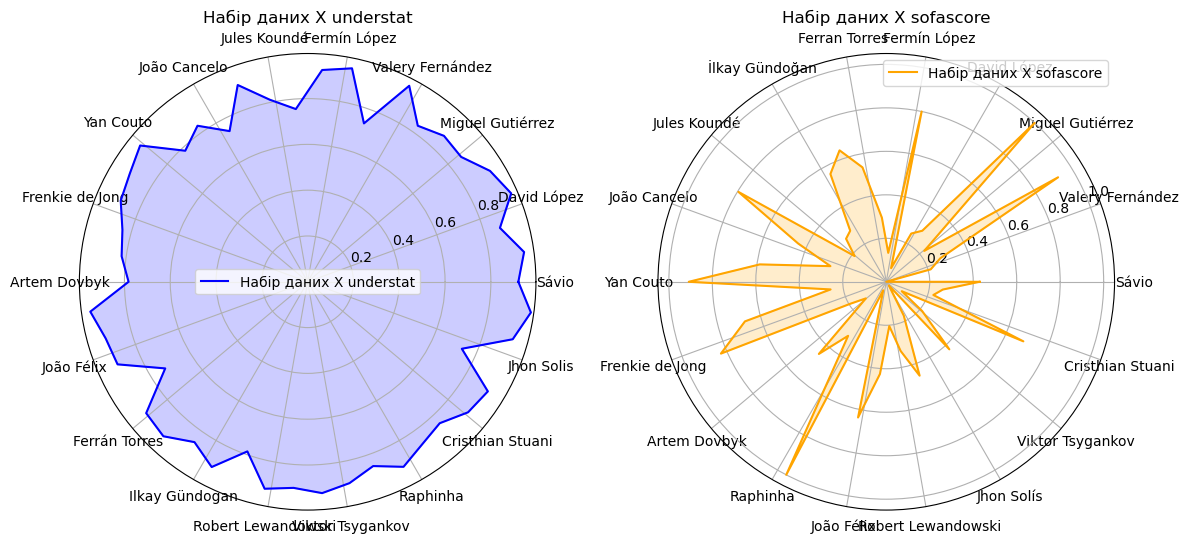

In [22]:
# Дані категорій (імена гравців). Треба привести імена до одного - İlkay Gündoğan
categories_understat = list(set(data_understat['player']))
categories_sofascore = list(set(data_sofascore['player_name']))


# Побудувати графік 1
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, polar=True)
radar_chart(ax1, data_understat['X'], 'Набір даних X understat', 'blue')
ax1.set_xticks(np.linspace(0, 2*np.pi, len(categories_understat), endpoint=False))
ax1.set_xticklabels(categories_understat)
ax1.set_title('Набір даних X understat')
ax1.legend()

# Побудувати графік 2
ax2 = plt.subplot(1, 2, 2, polar=True)
radar_chart(ax2, data_sofascore_scaled['X'], 'Набір даних X sofascore', 'orange')
ax2.set_xticks(np.linspace(0, 2*np.pi, len(categories_sofascore), endpoint=False))
ax2.set_xticklabels(categories_sofascore)
ax2.set_title('Набір даних X sofascore')
ax2.legend()

# Показати графіки
plt.tight_layout()
plt.show()


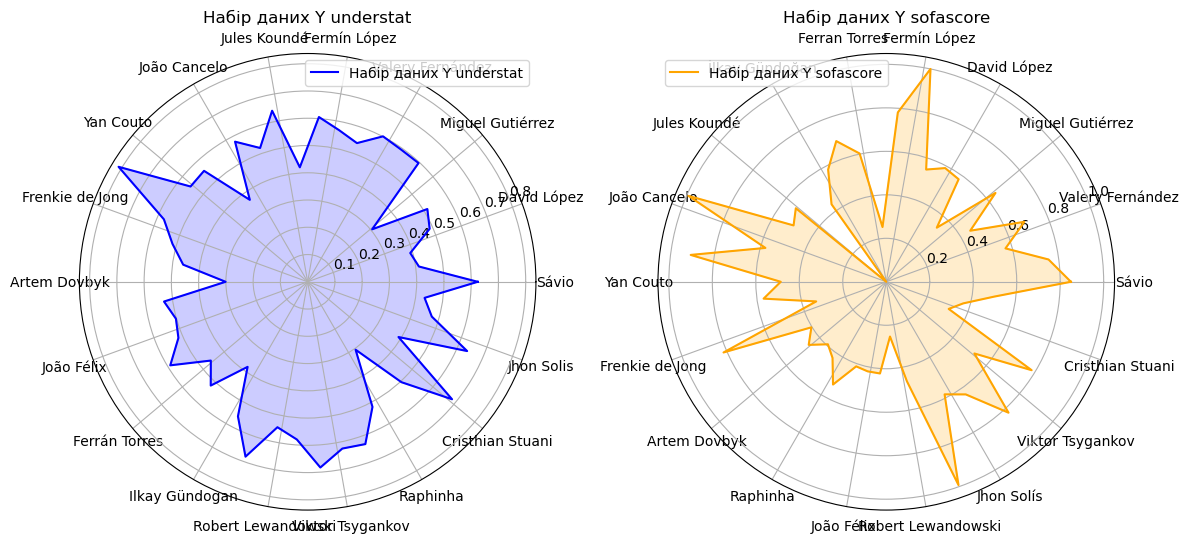

In [23]:
# Побудувати графік 1
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, polar=True)
radar_chart(ax1, data_understat['Y'], 'Набір даних Y understat', 'blue')
ax1.set_xticks(np.linspace(0, 2*np.pi, len(categories_understat), endpoint=False))
ax1.set_xticklabels(categories_understat)
ax1.set_title('Набір даних Y understat')
ax1.legend()

# Побудувати графік 2
ax2 = plt.subplot(1, 2, 2, polar=True)
radar_chart(ax2, data_sofascore_scaled['Y'], 'Набір даних Y sofascore', 'orange')
ax2.set_xticks(np.linspace(0, 2*np.pi, len(categories_sofascore), endpoint=False))
ax2.set_xticklabels(categories_sofascore)
ax2.set_title('Набір даних Y sofascore')
ax2.legend()

# Показати графіки
plt.tight_layout()
plt.show()


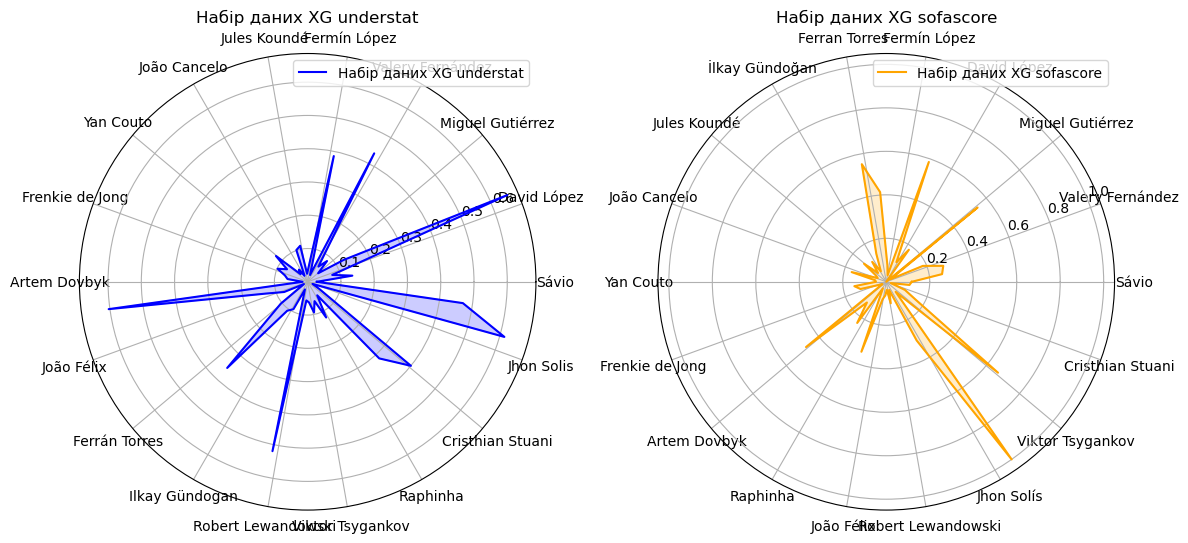

In [24]:
# Побудувати графік 1
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, polar=True)
radar_chart(ax1, data_understat['xG'], 'Набір даних XG understat', 'blue')
ax1.set_xticks(np.linspace(0, 2*np.pi, len(categories_understat), endpoint=False))
ax1.set_xticklabels(categories_understat)
ax1.set_title('Набір даних XG understat')
ax1.legend()

# Побудувати графік 2
ax2 = plt.subplot(1, 2, 2, polar=True)
radar_chart(ax2, data_sofascore_scaled['xg'], 'Набір даних XG sofascore', 'orange')
ax2.set_xticks(np.linspace(0, 2*np.pi, len(categories_sofascore), endpoint=False))
ax2.set_xticklabels(categories_sofascore)
ax2.set_title('Набір даних XG sofascore')
ax2.legend()

# Показати графіки
plt.tight_layout()
plt.show()
